<a href="https://colab.research.google.com/github/HosseinEyvazi/MDBSCAN-/blob/main/MDBSCAN%2B_Results_and_MS2OD_Issue_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load dataset


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def load_txt_data(file_path):
    data =np.loadtxt(file_path)

    X = data[:, :2]  # The first two columns are the features
    return X


def load_csv_data(file_path):
    """
    Load data from a CSV file.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        np.ndarray: Data loaded from the CSV file.
    """
    # Load the CSV file using pandas
    data = pd.read_csv(file_path)
    return data.to_numpy()





# MST

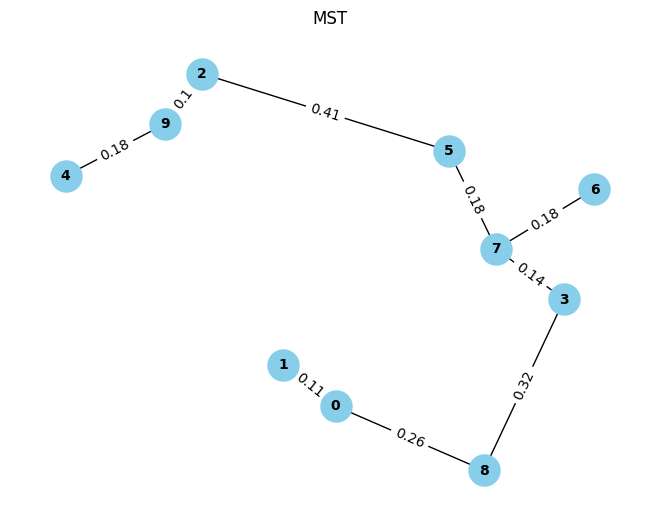

added_edges [(2, 9, {'weight': 0.1}), (4, 9, {'weight': 0.18}), (2, 5, {'weight': 0.41}), (5, 7, {'weight': 0.18}), (3, 7, {'weight': 0.14}), (6, 7, {'weight': 0.18}), (3, 8, {'weight': 0.32}), (0, 8, {'weight': 0.26}), (0, 1, {'weight': 0.11})]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


def construct_mst(data):
    # Create a complete graph from the data points
    G = nx.Graph()
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            distance = round(np.linalg.norm(data[i] - data[j]), 2)
            G.add_edge(i, j, weight=distance)

    # Find the lightest edge to start with
    min_edge = min(G.edges(data=True), key=lambda x: x[2]['weight'])

    # Initialize the MST and the list of added edges
    mst = nx.Graph()
    added_edges = []

    # Start Prim's algorithm from the lightest edge
    nodes = set(min_edge[:2])
    mst.add_edge(*min_edge[:2], weight=min_edge[2]['weight'])
    added_edges.append(min_edge)

    while len(nodes) < len(data):
        eligible_edges = [edge for edge in G.edges(data=True) if (edge[0] in nodes) ^ (edge[1] in nodes)]
        min_edge = min(eligible_edges, key=lambda x: x[2]['weight'])
        mst.add_edge(*min_edge[:2], weight=min_edge[2]['weight'])
        added_edges.append(min_edge)
        nodes.update(min_edge[:2])

    return mst, added_edges

def plot_mst(mst, data, title="MST"):
    pos = {i: data[i] for i in range(len(data))}
    nx.draw(mst, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels)
    plt.title(title)
    plt.grid(False)
    plt.show()

# Example usage
np.random.seed(300)
data = np.random.rand(10, 2)  # 10 random 2D points
mst, added_edges = construct_mst(data)
plot_mst(mst, data)
print('added_edges' , added_edges)


# Scaled MST

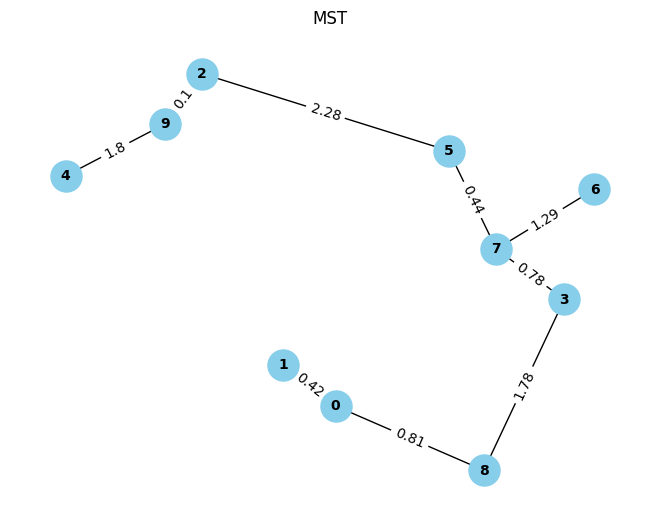

In [ ]:
def scaled_mst(mst, added_edges):
    # Initialize the scaled MST
    scaled_mst = nx.Graph()

    # Add the first edge with its original weight
    first_edge = added_edges[0]
    scaled_mst.add_edge(*first_edge[:2], weight=first_edge[2]['weight'])
    # print(f"Edge {first_edge[:2]}: Original weight = {first_edge[2]['weight']} (first edge)")

    # Process the rest of the edges
    for i in range(1, len(added_edges)):
        current_edge = added_edges[i]
        previous_edge = added_edges[i - 1]

        # Calculate the scaled weight using original weights only
        scaled_weight = round(current_edge[2]['weight'] / previous_edge[2]['weight'], 2)
        scaled_mst.add_edge(*current_edge[:2], weight=scaled_weight)

        # Print the weight scaling process
        # print(f"Edge {current_edge[:2]}: Original weight = {current_edge[2]['weight']}, Previous weight = {previous_edge[2]['weight']}, Scaled weight = {scaled_weight}")

    return scaled_mst

# Example usage
np.random.seed(300)
data = np.random.rand(10, 2)  # 10 random 2D points
mst, added_edges = construct_mst(data)
scaled_mst_graph = scaled_mst(mst, added_edges)
plot_mst(scaled_mst_graph, data)


In [ ]:
def cut_tree(mst, data):
    def plot_mst(mst, data, title):
        pos = {i: data[i] for i in range(len(data))}
        plt.figure(figsize=(8, 6))
        nx.draw(mst, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold')
        labels = nx.get_edge_attributes(mst, 'weight')
        nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels)
        plt.title(title)
        plt.grid(False)
        plt.show()

    # Sort the edges in descending order of weight
    sorted_edges = sorted(mst.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    iterations = []

    for i, edge in enumerate(sorted_edges):
        mst_copy = mst.copy()
        mst_copy.remove_edge(edge[0], edge[1])

        # Get the two resulting subgraphs
        components = list(nx.connected_components(mst_copy))
        if len(components) < 2:
            continue  # Skip if removing the edge does not split the graph

        subgraph1 = mst.subgraph(components[0]).copy()
        subgraph2 = mst.subgraph(components[1]).copy()

        iterations.append((subgraph1, subgraph2))

        # Plot the resulting MSTs
        # plot_mst(subgraph1, data, f"Subgraph 1 after cutting edge {edge[:2]}")
        # plot_mst(subgraph2, data, f"Subgraph 2 after cutting edge {edge[:2]}")

    return iterations

# Example usage
np.random.seed(300)
data = np.random.rand(100, 2)  # 10 random 2D points
mst, added_edges = construct_mst(data)
scaled_mst_graph = scaled_mst(mst, added_edges)
iterations = cut_tree(scaled_mst_graph, data)
print(iterations)


[(<networkx.classes.graph.Graph object at 0x7d7f49f5a7a0>, <networkx.classes.graph.Graph object at 0x7d7f49f594e0>), (<networkx.classes.graph.Graph object at 0x7d7f49c351b0>, <networkx.classes.graph.Graph object at 0x7d7f20c97fa0>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd720>, <networkx.classes.graph.Graph object at 0x7d7f20ccdf60>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd750>, <networkx.classes.graph.Graph object at 0x7d7f20ccdf30>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd7e0>, <networkx.classes.graph.Graph object at 0x7d7f20ccd6f0>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd900>, <networkx.classes.graph.Graph object at 0x7d7f20ccd870>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd960>, <networkx.classes.graph.Graph object at 0x7d7f20ccd810>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd840>, <networkx.classes.graph.Graph object at 0x7d7f20ccd990>), (<networkx.classes.graph.Graph object at 0x7d7f20ccd8a0>, <networkx.cla

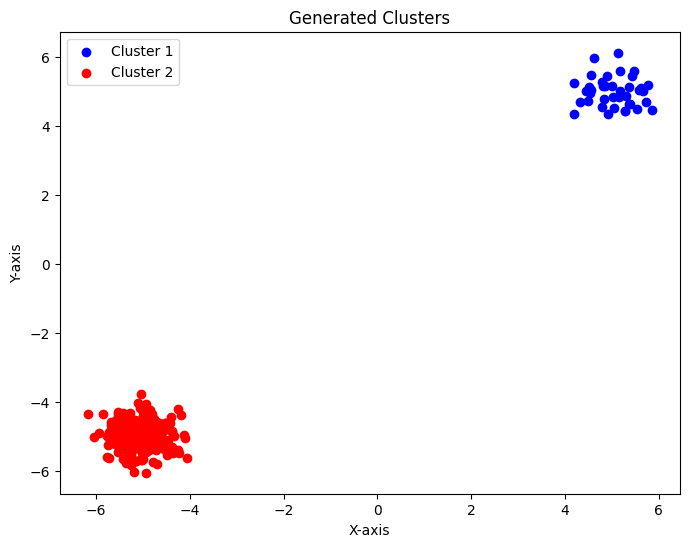

[(<networkx.classes.graph.Graph object at 0x7d7f49e58130>, <networkx.classes.graph.Graph object at 0x7d7f49e5a0b0>), (<networkx.classes.graph.Graph object at 0x7d7f49e5ae90>, <networkx.classes.graph.Graph object at 0x7d7f49e5b550>), (<networkx.classes.graph.Graph object at 0x7d7f49e59960>, <networkx.classes.graph.Graph object at 0x7d7f49e5a8f0>), (<networkx.classes.graph.Graph object at 0x7d7f49e5abc0>, <networkx.classes.graph.Graph object at 0x7d7f49e5aad0>), (<networkx.classes.graph.Graph object at 0x7d7f49e5bd90>, <networkx.classes.graph.Graph object at 0x7d7f49e5b460>), (<networkx.classes.graph.Graph object at 0x7d7f49e5a8c0>, <networkx.classes.graph.Graph object at 0x7d7f49e5b790>), (<networkx.classes.graph.Graph object at 0x7d7f49e5a9b0>, <networkx.classes.graph.Graph object at 0x7d7f49e5ad40>), (<networkx.classes.graph.Graph object at 0x7d7f49e5b0d0>, <networkx.classes.graph.Graph object at 0x7d7f49e5a3b0>), (<networkx.classes.graph.Graph object at 0x7d7f49e5b6a0>, <networkx.cla

In [ ]:



def generate_clusters(num_cluster1=40, num_cluster2=200):
    random.seed(654)
    # Define the centers of the clusters with more separation
    center1 = np.array([5, 5])  # Moved further from origin
    center2 = np.array([-5, -5])  # Moved further from origin

    # Define the standard deviation for high density
    std_dev = 0.4

    # Generate cluster 1
    cluster1 = np.random.randn(num_cluster1, 2) * std_dev + center1

    # Generate cluster 2
    cluster2 = np.random.randn(num_cluster2, 2) * std_dev + center2

    # Combine clusters
    data = np.vstack((cluster1, cluster2))

    # Optionally plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', label='Cluster 1')
    plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', label='Cluster 2')
    plt.title('Generated Clusters')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(False)
    plt.show()

    return data
def modified_cut_tree(mst, data):
    def plot_mst(mst, data, title):
        pos = {i: data[i] for i in range(len(data))}
        plt.figure(figsize=(8, 6))
        nx.draw(mst, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold')
        labels = nx.get_edge_attributes(mst, 'weight')
        nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels)
        plt.title(title)
        plt.grid(False)
        plt.show()

    # Calculate minnormal
    minnormal = round(math.sqrt(len(data) / data.shape[1]))*100

    # Sort the edges in descending order of weight
    sorted_edges = sorted(mst.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    iterations = []
    keep_cutting = True

    for i, edge in enumerate(sorted_edges):
        if not keep_cutting:
            break

        mst_copy = mst.copy()
        mst_copy.remove_edge(edge[0], edge[1])

        # Get the two resulting subgraphs
        components = list(nx.connected_components(mst_copy))
        if len(components) < 2:
            continue  # Skip if removing the edge does not split the graph

        subgraph1 = mst.subgraph(components[0]).copy()
        subgraph2 = mst.subgraph(components[1]).copy()

        # Check if the cut leads to any subgraph being smaller than minnormal
        if len(subgraph1.nodes()) < minnormal or len(subgraph2.nodes()) < minnormal:
            keep_cutting = False  # Stop further cutting if the condition is met

        iterations.append((subgraph1, subgraph2))

        # Plot the resulting MSTs
        # plot_mst(subgraph1, data, f"Subgraph 1 after cutting edge {edge[:2]}")
        # plot_mst(subgraph2, data, f"Subgraph 2 after cutting edge {edge[:2]}")

    return iterations


# Example usage
data = generate_clusters()
# data = load_txt_data('clusters_30_500.txt')
# data =data[:, :1]
mst, added_edges = construct_mst(data)
scaled_mst_graph = scaled_mst(mst, added_edges)
iterations = cut_tree(scaled_mst_graph, data)
print(iterations)


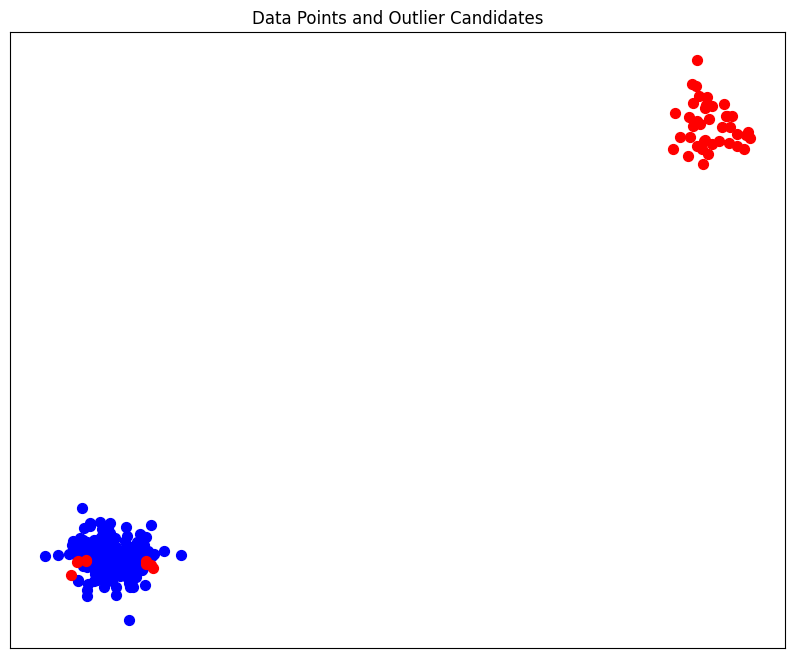

Outlier Candidates: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 57, 59, 69, 79, 145, 92, 220, 100, 101]


In [ ]:
def outlier_candidates(iterations, data):
    candidates = set()
    pos = {i: data[i] for i in range(len(data))}  # Position map for plotting

    # Collect all nodes from smaller subgraphs of each cut
    for subgraph1, subgraph2 in iterations:
        if len(subgraph1.nodes()) < len(subgraph2.nodes()):
            candidates.update(subgraph1.nodes())
        else:
            candidates.update(subgraph2.nodes())

    # Convert set of candidates to list for consistent plotting
    candidate_list = list(candidates)

    # Plotting the data
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(data, pos, nodelist=set(range(len(data))) - candidates, node_color='blue', node_size=50)
    nx.draw_networkx_nodes(data, pos, nodelist=candidate_list, node_color='red', node_size=50)
    plt.title("Data Points and Outlier Candidates")
    plt.axis('on')
    plt.show()

    return candidate_list

mst, added_edges = construct_mst(data)
scaled_mst_graph = scaled_mst(mst, added_edges)
iterations = modified_cut_tree(scaled_mst_graph, data)
outlier_nodes = outlier_candidates(iterations, data)
print("Outlier Candidates:", outlier_nodes)


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.stats import zscore

def calculate_knn_distances(cluster_data, k=5):
    """
    Calculate the k-nearest neighbor (k-NN) distances for each point in the cluster.

    Args:
        cluster_data (np.ndarray): A 2D array of points in the cluster.
        k (int): The number of nearest neighbors to consider.

    Returns:
        np.ndarray: An array of average k-NN distances for each point in the cluster.
    """
    # Ensure that k does not exceed the number of points in the cluster
    n_neighbors = min(k + 1, len(cluster_data))

    # Initialize the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(cluster_data)
    distances, _ = nbrs.kneighbors(cluster_data)

    # Calculate the average distance to the k nearest neighbors, ignoring the first distance (which is the point itself)
    avg_knn_distances = np.mean(distances[:, 1:], axis=1)

    return avg_knn_distances

def verify_candidates(clusters, data, candidates, k=5):
    """Verify outlier candidates based on their k-NN distance compared to the average k-NN distance of their cluster."""
    verified_outliers = []

    # Iterate over each cluster
    for cluster_id, points_indices in clusters.items():
        # Extract the cluster data
        cluster_data = data[points_indices, :]
        # Calculate k-NN distances within the cluster
        knn_distances = calculate_knn_distances(cluster_data, k)

        # Calculate the average k-NN distance of the cluster
        avg_knn_distance = np.mean(knn_distances)

        # Check candidates in this cluster
        for idx in points_indices:
            if idx in candidates:
                candidate_idx_in_cluster = list(points_indices).index(idx)
                candidate_knn_distance = knn_distances[candidate_idx_in_cluster]
                # Verify if the candidate's k-NN distance is greater than the cluster's average k-NN distance
                if candidate_knn_distance > avg_knn_distance * 2:
                    verified_outliers.append(idx)
                    print(f"Verified outlier: Index {idx} in cluster {cluster_id} with k-NN distance {candidate_knn_distance}")

    return verified_outliers


# Example Usage:
# Assuming 'clusters' is a dictionary with cluster_id as keys and list of indices as values
# 'data' is a numpy array of all points, 'candidates' is a list of indices of candidate outliers

# clusters = {0: [0, 1, 2, 3], 1: [4, 5, 6, 7]}
# data = np.array([...])  # Your data points
# candidates = [1, 5, 7]

# verified_outliers = verify_candidates(clusters, data, candidates)



importing MDBSCAN

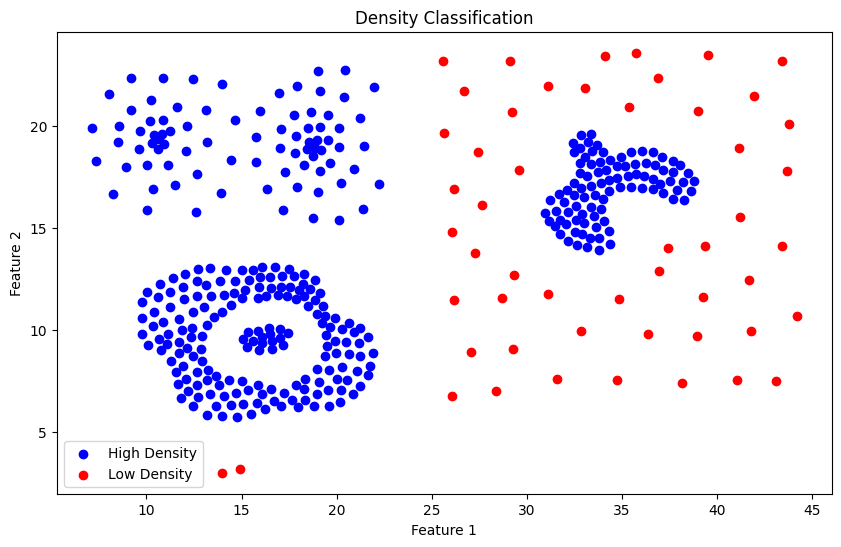

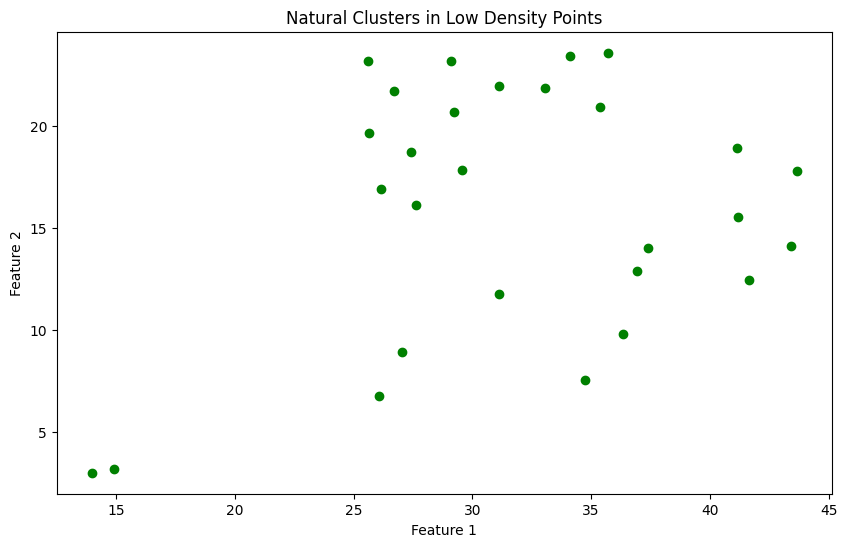

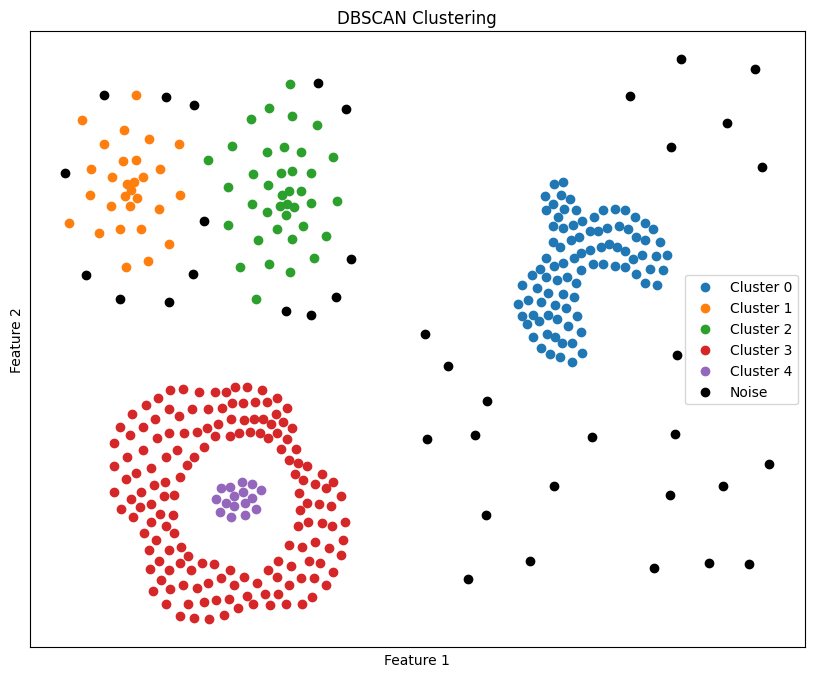

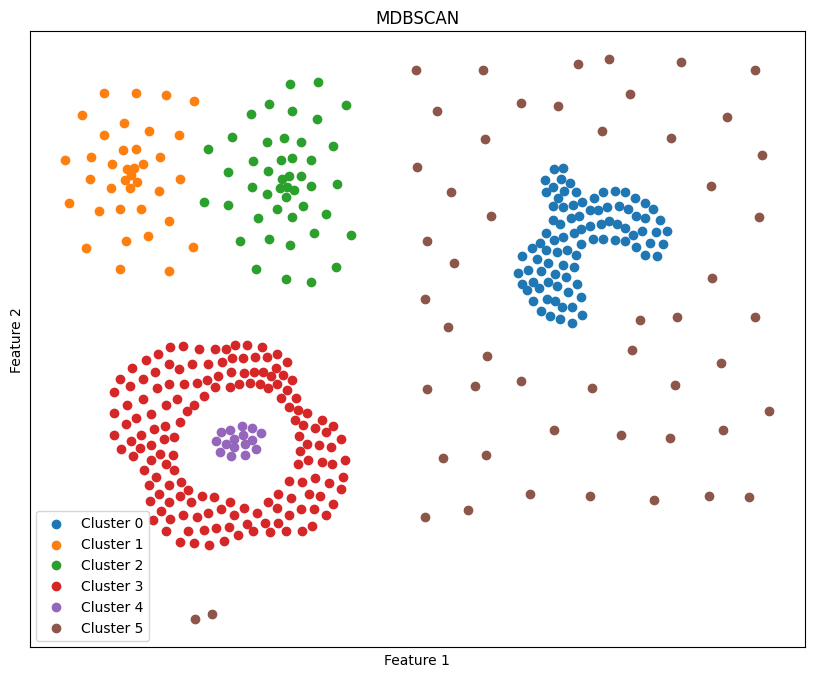

(array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def load_txt_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # The first two columns are the features
    return X

def calculate_relative_density(X, k):
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(X)
    distances, indices = nbrs.kneighbors(X)
    rd = np.sum(distances[:, 1:], axis=1) / k
    return rd

def classify_density(X, rd, t):
    high_density = X[rd < t]
    low_density = X[rd >= t]
    return high_density, low_density

def plot_density_classification(high_density, low_density):
    plt.figure(figsize=(10, 6))
    plt.scatter(high_density[:, 0], high_density[:, 1], color='blue', label='High Density')
    plt.scatter(low_density[:, 0], low_density[:, 1], color='red', label='Low Density')
    plt.legend()
    plt.title('Density Classification')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def snnc(low_density, k):
    num = len(low_density)
    if num <= k:
        return low_density, np.array([])

    nbrs = NearestNeighbors(n_neighbors=min(k+1, num), algorithm='auto').fit(low_density)
    indices = nbrs.kneighbors(low_density, return_distance=False)
    clusters = [set([i]) for i in range(num)]

    for i in range(num):
        for j in range(i+1, num):
            if len(set(indices[i][1:]) & set(indices[j][1:])) >= 1:
                clusters[i] = clusters[i] | clusters[j]
                clusters[j] = set()

    merged = True
    while merged:
        merged = False
        for i in range(num):
            for j in range(i+1, num):
                if len(clusters[i] & clusters[j]) >= 1:
                    clusters[i] = clusters[i] | clusters[j]
                    clusters[j] = set()
                    merged = True

    clusters = [cluster for cluster in clusters if len(cluster) > 0]
    cluster_sizes = [len(cluster) for cluster in clusters]
    mean_cluster_size = np.mean(cluster_sizes)
    large_clusters = [cluster for cluster in clusters if len(cluster) >= mean_cluster_size]

    merged_indices = [index for cluster in large_clusters for index in cluster]
    merged_points = low_density[merged_indices]

    remaining_indices = list(set(range(num)) - set(merged_indices))
    remaining_points = low_density[remaining_indices]

    return merged_points, remaining_points

def plot_points(points, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(points[:, 0], points[:, 1], color='green')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def union_high_density_and_remaining_points(high_density, unnature):
    if unnature.size == 0:
        return high_density
    if high_density.size == 0:
        return unnature
    return np.vstack((high_density, unnature))

def union_of_clusters(points, labels, other_points):
    union_points = np.vstack((points, other_points))
    new_cluster_label = labels.max() + 1 if labels.size > 0 else 0
    other_points_labels = np.full(other_points.shape[0], new_cluster_label)
    union_labels = np.concatenate((labels, other_points_labels))
    return union_points, union_labels

def run_dbscan(union_points, eps, min_samples, plot_title='DBSCAN Clustering'):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(union_points)
    plot_points_with_clusters(union_points, cluster_labels, plot_title)
    return cluster_labels


def assign_outliers_to_nearest_cluster(data, labels):
    non_outliers = data[labels != -1]
    non_outlier_labels = labels[labels != -1]
    if len(non_outliers) == 0:
        return labels

    nbrs = NearestNeighbors(n_neighbors=1).fit(non_outliers)
    assigned_clusters = {}

    def find_nearest_non_outlier(point, visited):
        _, indices = nbrs.kneighbors([point])
        nearest_label = non_outlier_labels[indices[0][0]]
        return nearest_label

    def assign_cluster_to_outlier(outlier_index, visited):
        if outlier_index in assigned_clusters:
            return assigned_clusters[outlier_index]

        visited.add(outlier_index)
        point = data[outlier_index]
        nbrs_all = NearestNeighbors(n_neighbors=2).fit(data)
        _, indices = nbrs_all.kneighbors([point])

        nearest_index = indices[0][1]
        if labels[nearest_index] == -1:
            if nearest_index in visited:
                cluster = find_nearest_non_outlier(point, visited)
            else:
                cluster = assign_cluster_to_outlier(nearest_index, visited)
        else:
            cluster = labels[nearest_index]

        assigned_clusters[outlier_index] = cluster
        return cluster

    for i in range(len(data)):
        if labels[i] == -1:
            visited = set()
            labels[i] = assign_cluster_to_outlier(i, visited)

    return labels


import numpy as np
import matplotlib.pyplot as plt

def plot_points_with_clusters(X, reordered_labels, title):
    """
    Plots the points with their respective clusters, with no grid lines or ticks.

    Parameters:
    - X: numpy array or list of shape (n_samples, n_features), the data points.
    - reordered_labels: list or numpy array of shape (n_samples,), the cluster labels for the points.
    - title: str, the title for the plot.
    """
    plt.figure(figsize=(10, 8))
    unique_labels = set(reordered_labels)

    # Plot each cluster with a different color
    for label in unique_labels:
        # Find points belonging to the current cluster
        cluster_points = X[np.where(reordered_labels == label)]

        # Handle noise points if present
        if label == -1:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label='Noise', color='k')
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Hide grid lines
    plt.grid(False)

    # Hide ticks and tick labels on both axes
    plt.xticks([])
    plt.yticks([])

    plt.legend()
    plt.show()

def MDBSCAN(file_path, eps, minpts, k, t):
    # Get the dataset
    X = load_txt_data(file_path)

    # Extract high and low density points
    rd = calculate_relative_density(X, k)
    high_density, low_density = classify_density(X, rd, t)
    plot_density_classification(high_density, low_density)

    # Get the natural clusters and unnature points from low-density points
    natural_clusters, unnature = snnc(low_density, k)
    plot_points(natural_clusters, "Natural Clusters in Low Density Points")

    # Find union of unnature and high density (union_points)
    union_points = union_high_density_and_remaining_points(high_density, unnature)

    # Run DBSCAN on the union
    cluster_labels = run_dbscan(union_points, eps, minpts)

    # Find the union of natural clusters and the result of DBSCAN
    up, ulabels = union_of_clusters(union_points, cluster_labels, natural_clusters)

    # Assign outliers to nearest cluster
    new_labels = assign_outliers_to_nearest_cluster(up, ulabels)

    # Map new_labels back to the original order of X
    label_mapping = {tuple(up[i]): new_labels[i] for i in range(len(up))}
    reordered_labels = np.array([label_mapping[tuple(point)] for point in X])

    # Plot the result
    plot_points_with_clusters(X, reordered_labels, "MDBSCAN")

    # Return the result
    return reordered_labels, X


MDBSCAN('Compound.txt' ,1.5 ,6, 5 , 2.1)



# applying our outlier detection on MDBSCAN


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_clusters_with_outliers(up, clusters, verified_outliers, title="MDBSCAN+"):
    # Generate a map from indices to cluster labels for easy plotting
    index_to_cluster = {index: cluster for cluster, indices in clusters.items() for index in indices}

    # Prepare colors, each cluster has a different color, outliers in red
    colors = ['blue', 'green', 'yellow', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'gray', 'pink']
    cluster_colors = [
        colors[index_to_cluster[i] % len(colors)] if i not in verified_outliers else 'black'
        for i in range(len(up))
    ]

    # Plot each point, coloring by cluster
    plt.figure(figsize=(10, 8))
    plt.scatter(up[:, 0], up[:, 1], c=cluster_colors, edgecolor='k', s=50)
    plt.title(title)
    plot.legend()
    # Hide axes and grid lines
    plt.grid(False)

    plt.show()


def verify_outliers(data, eps, minpts, k, t):
    # Run MDBSCAN to get clusters and data points
    new_labels, up = MDBSCAN(data, eps, minpts, k, t)  # MDBSCAN must now accept data directly

    # Organize data points into clusters
    clusters = {}
    for index, label in enumerate(new_labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(index)

    # Generate iterations and candidates from your existing function
    _, added_edges = construct_mst(up)
    scaled_mst_graph = scaled_mst(_, added_edges)
    iterations = modified_cut_tree(scaled_mst_graph, up)
    candidates = outlier_candidates(iterations, up)

    # Verify candidates using clusters
    verified_outliers = verify_candidates(clusters, up, candidates, k=k)

    # Remove verified outliers from the original clusters
    new_clusters = {}
    for label, indices in clusters.items():
        new_clusters[label] = [i for i in indices if i not in verified_outliers]

    # Create a cluster with label -1 that contains verified outliers
    new_clusters[-1] = verified_outliers

    # Plot the clusters including the verified outliers
    plot_clusters_with_outliers(up, clusters, verified_outliers)

    # Return both clusters and verified outliers
    return new_clusters, clusters, verified_outliers


def compute_nmi_with_clusters(cluster_dict, file_path):
    def load_txt_data(file_path):
        data = np.loadtxt(file_path)
        y_true = data[:, 2]  # The last column is the ground truth cluster labels
        return y_true
    # print('data ' , data)
    # Load ground truth data
    y_true = load_txt_data(file_path)
    # print("y ground truth " , y_true)
    n_samples = len(y_true)

    # Convert the cluster dictionary to a flat list of cluster labels
    y_pred = np.full(n_samples, -1, dtype=int)  # Initialize with -1 for unassigned indices (outliers)
    # print(len(y_pred))
    for cluster_label, indices in cluster_dict.items():
        for idx in indices:
            y_pred[idx] = cluster_label
    # print("ypred" , y_pred)
    # Ensure the labels are properly aligned in terms of length
    if len(y_true) != len(y_pred):
        raise ValueError(f"Inconsistent number of samples between y_true ({len(y_true)}) and y_pred ({len(y_pred)})")

    # Calculate NMI
    nmi_score = normalized_mutual_info_score(y_true, y_pred, average_method='arithmetic')

    return nmi_score


## Example usages

# usage 0 (Compound without outlier)

# usage 1 (compound with outliers)

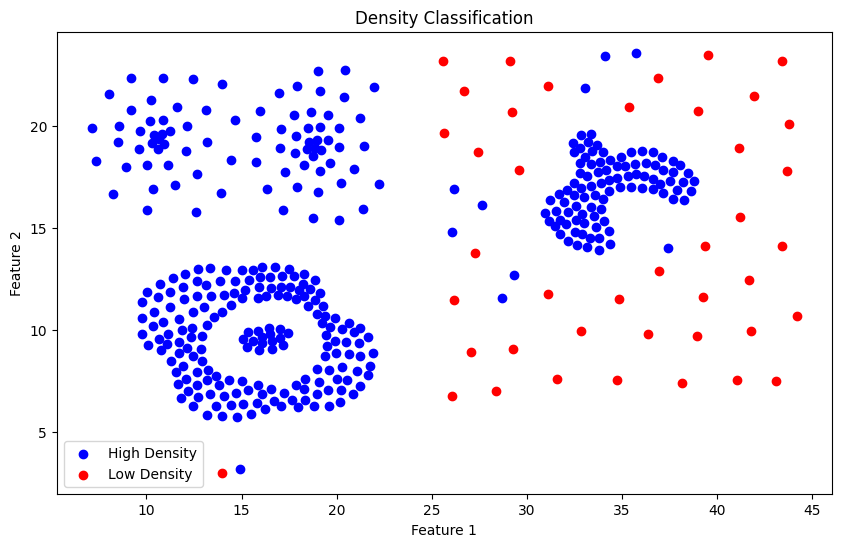

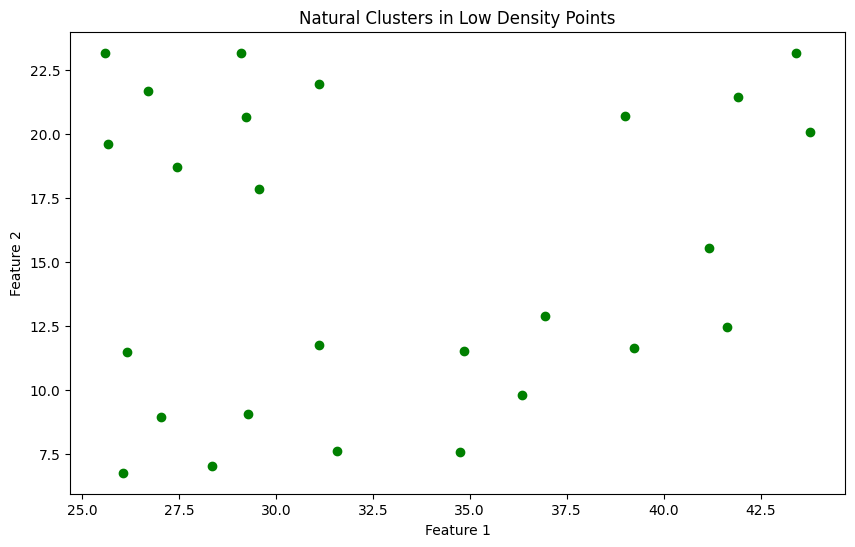

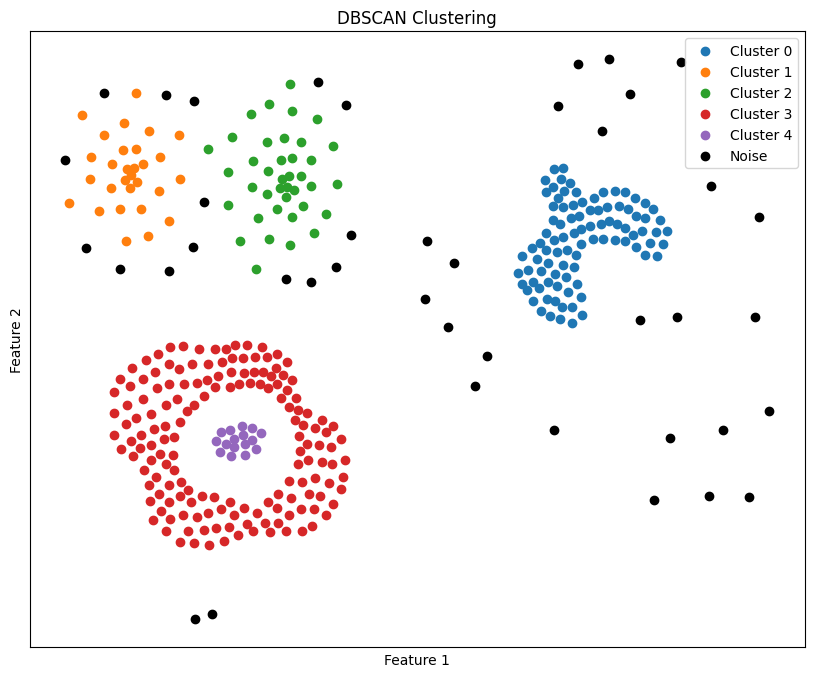

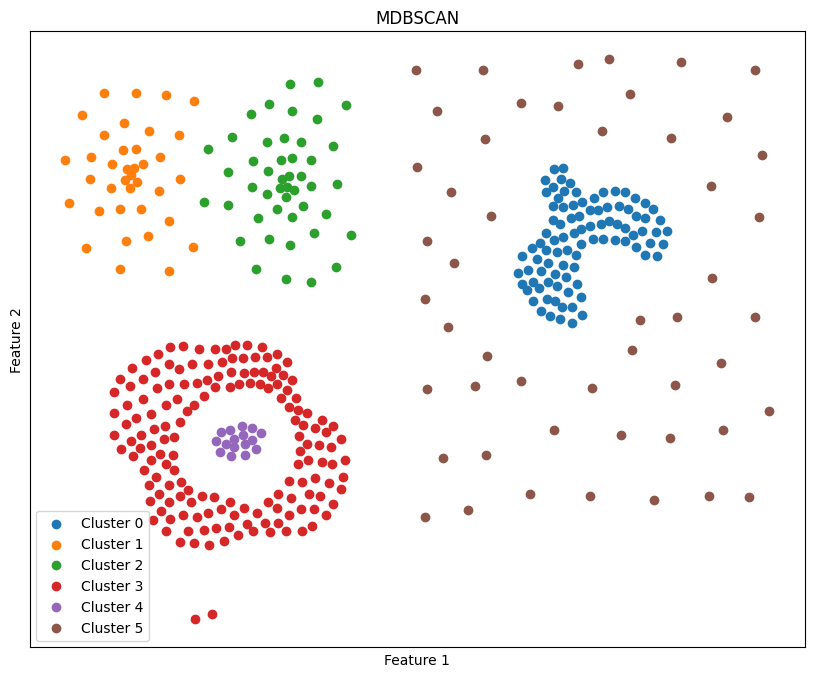

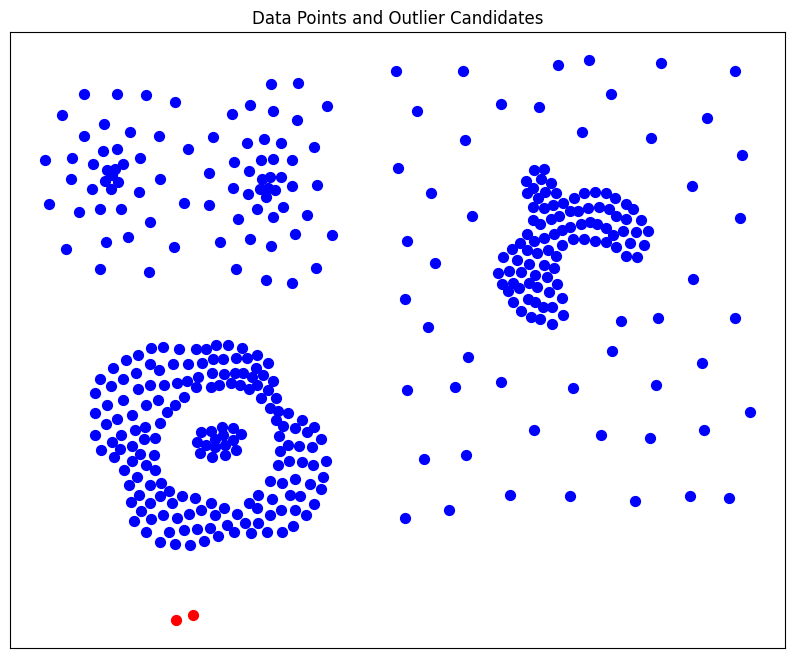

Verified outlier: Index 399 in cluster 3 with k-NN distance 2.1909464671550745
Verified outlier: Index 400 in cluster 3 with k-NN distance 2.0807419126020386


NameError: name 'plot' is not defined

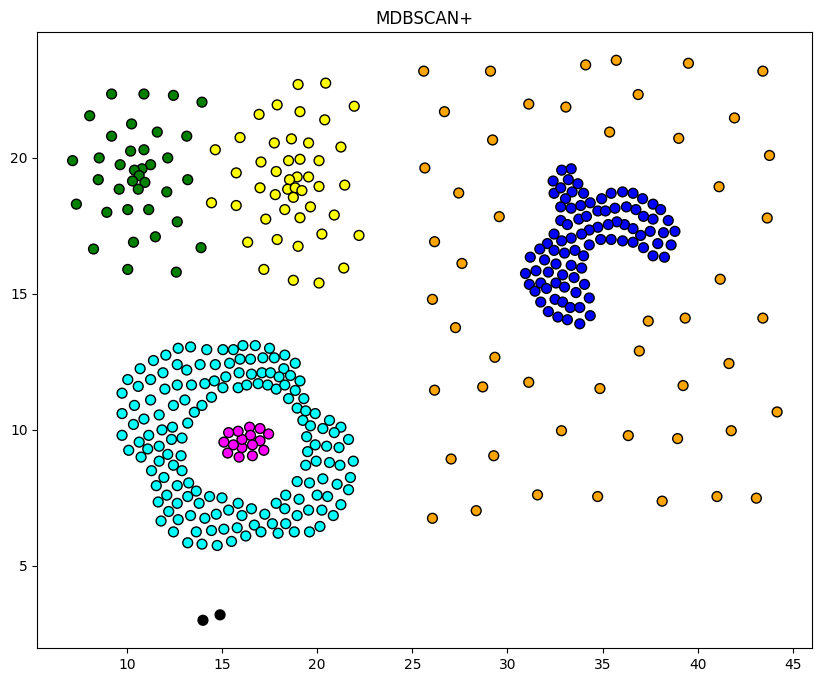

In [ ]:

dataset_address = 'Compound.txt'      #important note
new_clusters , clusters, verified_outliers = verify_outliers(dataset_address, eps=1.5, minpts=6, k=3, t=2.1)

print("Clusters:", clusters)
print("Verified Outliers:", verified_outliers)
print("new clusters:", new_clusters)


nmi_score = compute_nmi_with_clusters(new_clusters, dataset_address)
print(f"nmi Score: {nmi_score}")



# usage 2 (flame)

In [ ]:

dataset_address = 'flame.txt'      #important note
new_clusters , clusters, verified_outliers = verify_outliers(dataset_address, eps=1.3, minpts=8, k=3, t=2.5)

print("Clusters:", clusters)
print("Verified Outliers:", verified_outliers)
print("new clusters:", new_clusters)

nmi_score = compute_nmi_with_clusters(new_clusters, dataset_address)
print(f"nmi Score: {nmi_score}")



# usage 3 (synthetic)


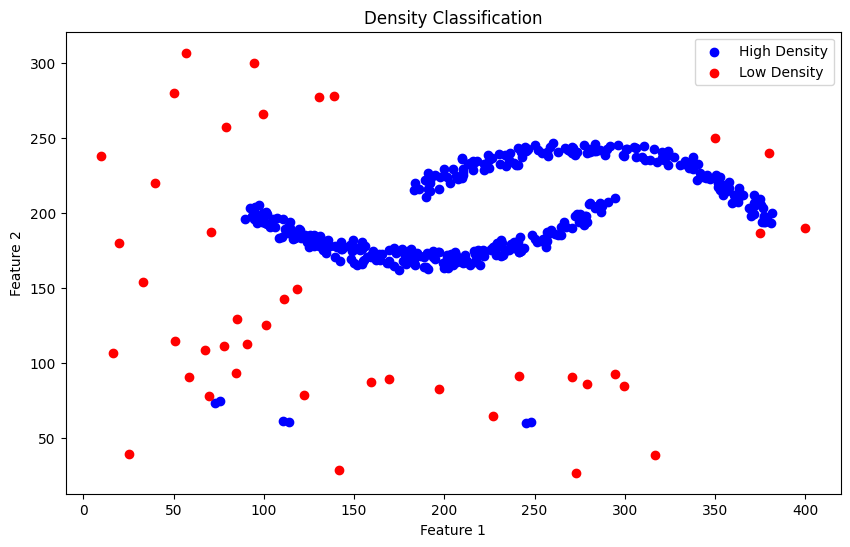

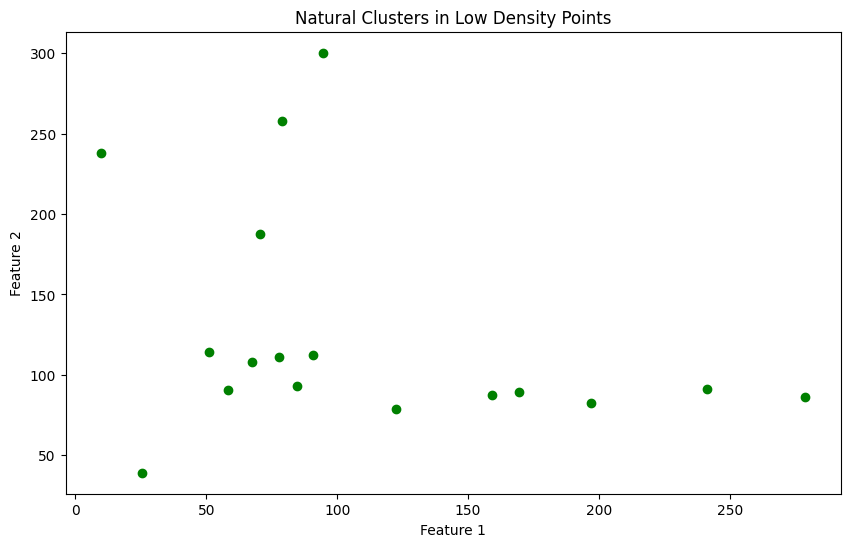

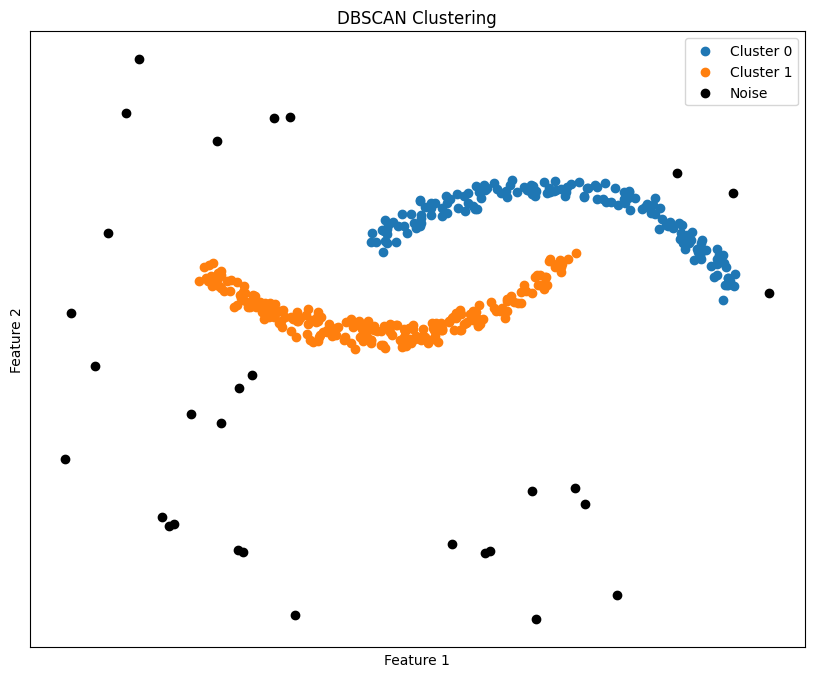

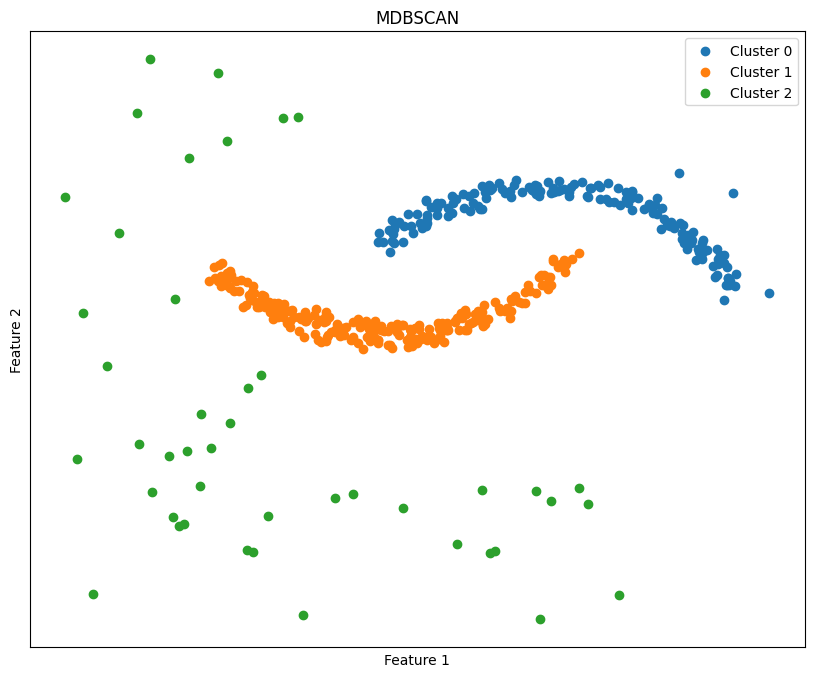

In [ ]:

dataset_address = 'isolation.txt'      #important note
new_clusters , clusters, verified_outliers = verify_outliers(dataset_address, eps=10.3, minpts=4, k=1, t=5.3)

print("Clusters:", clusters)
print("Verified Outliers:", verified_outliers)
print("new clusters:", new_clusters)

nmi_score = compute_nmi_with_clusters(new_clusters, dataset_address)
print(f"nmi Score: {nmi_score}")

